In [1]:
%tensorflow_version 1.x

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent = 4)
sess = tf.InteractiveSession()

In [3]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

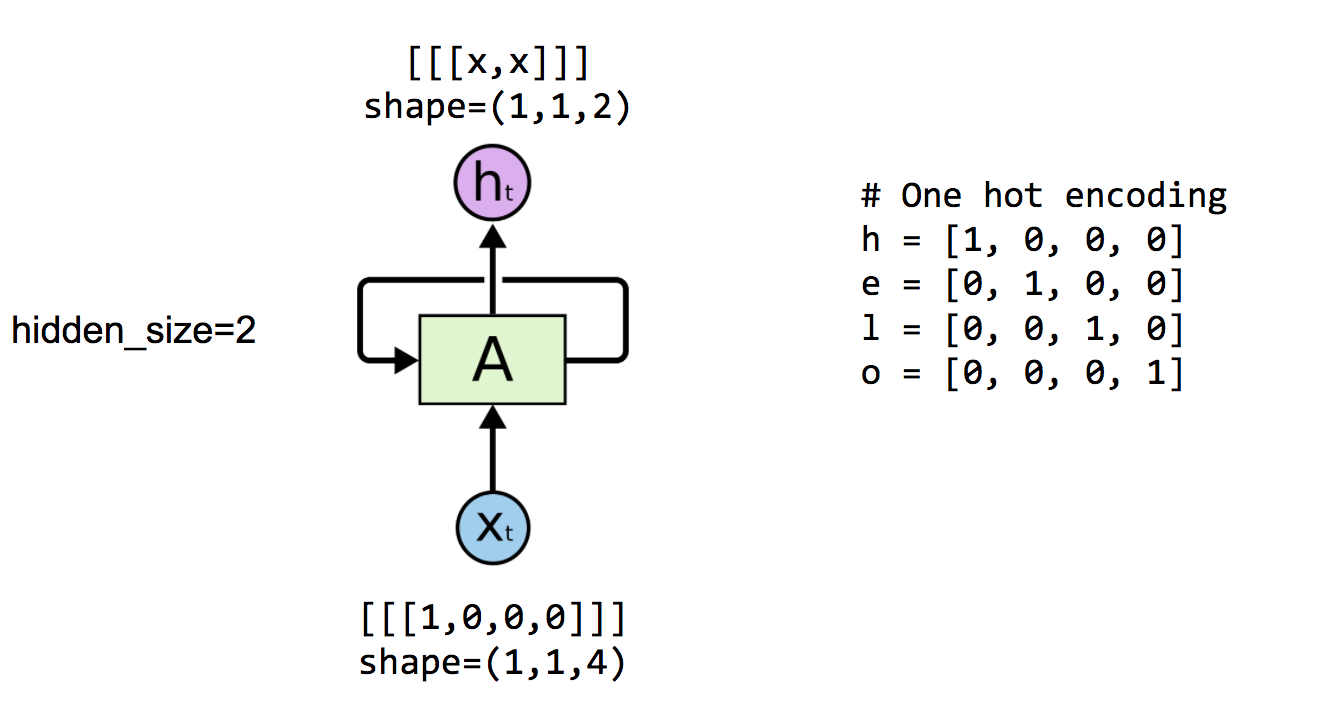

In [4]:
with tf.variable_scope('one_cell') as scope:
  # One cell RNN input_dim (4) -> output_dim (2)
  hidden_size = 2
  cell = tf.keras.layers.SimpleRNNCell(units = hidden_size)
  print(cell.output_size, cell.state_size)

  x_data = np.array([[h]], dtype = np.float32) # x_data = [[[1,0,0,0]]]
  pp.pprint(x_data)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)

  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval())

2 2
array([[[1., 0., 0., 0.]]], dtype=float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
array([[[-0.16004092,  0.7438236 ]]], dtype=float32)


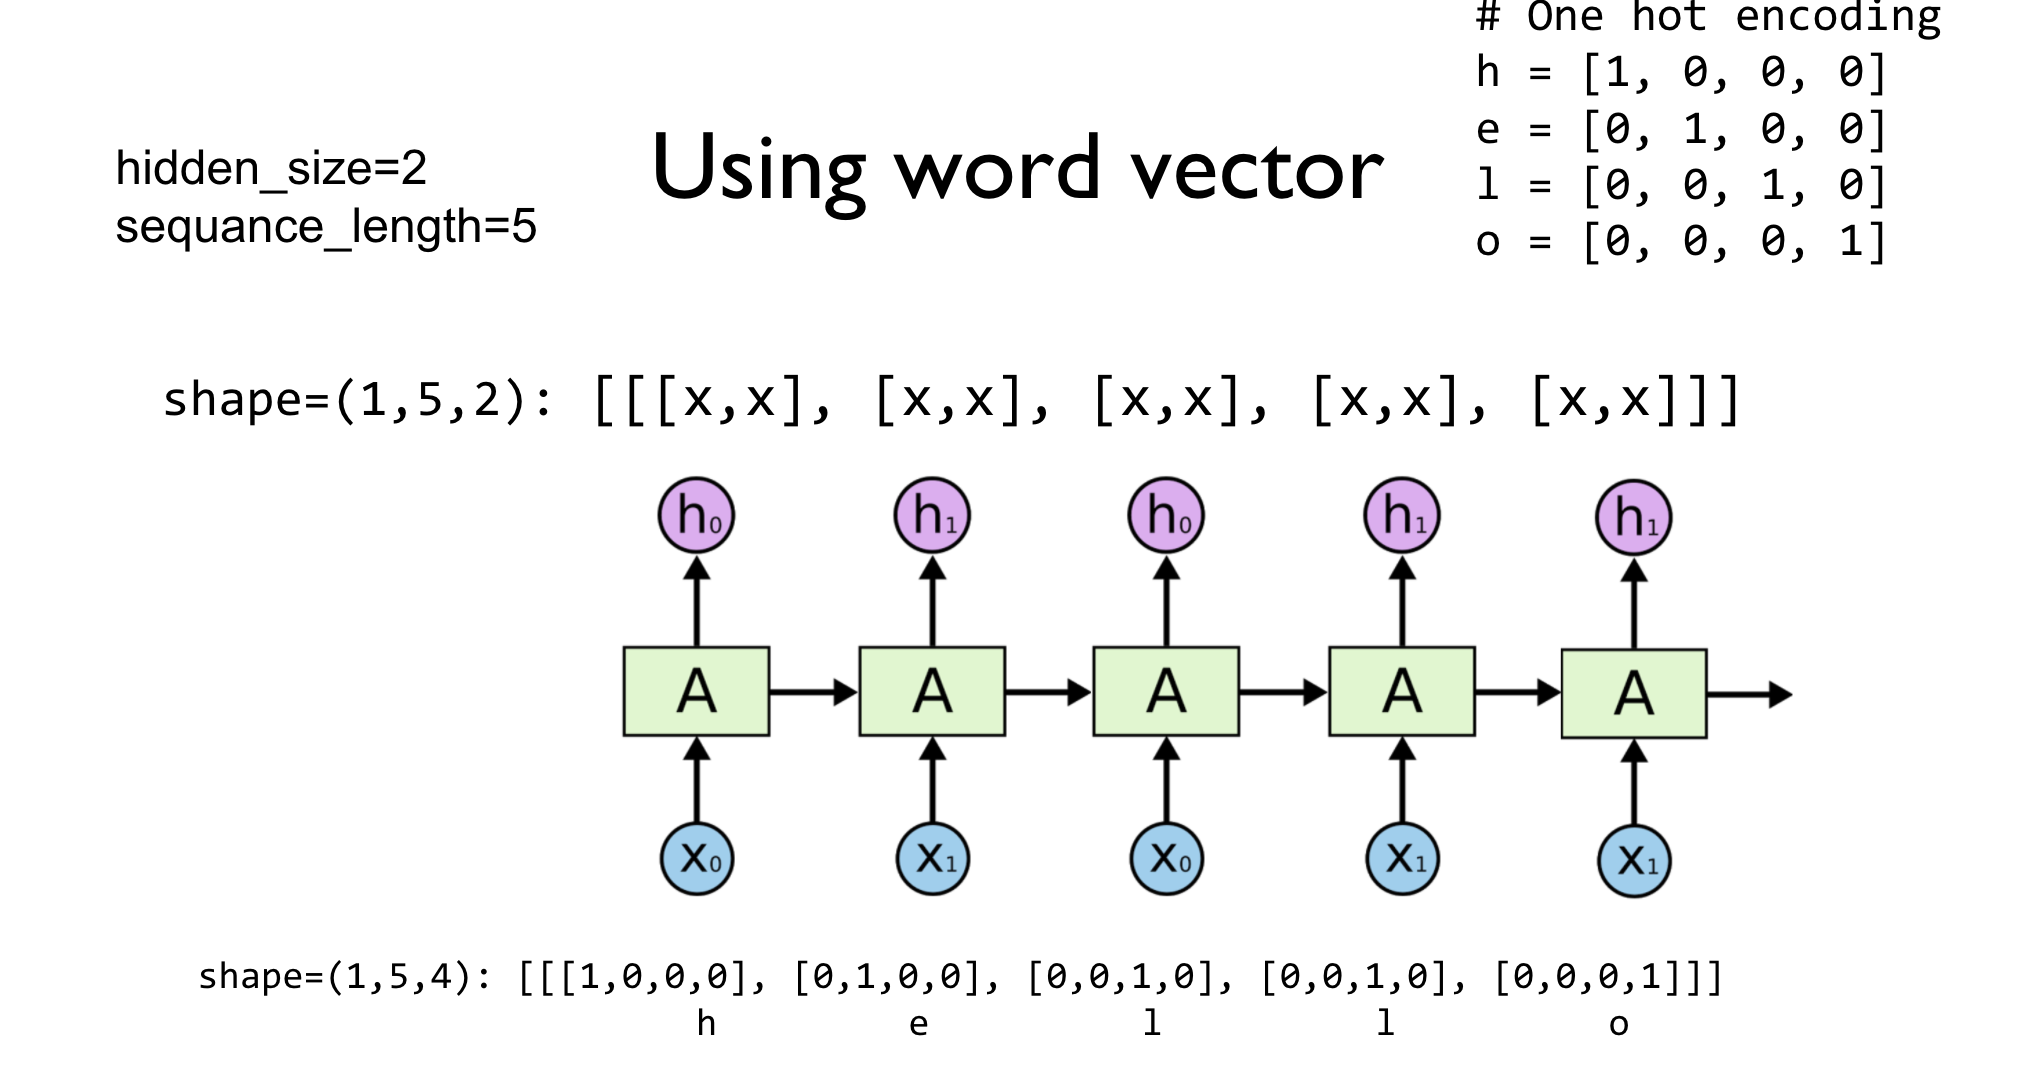

In [5]:
with tf.variable_scope('two_sequances') as scope:
  # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
  hidden_size = 2
  cell = tf.keras.layers.SimpleRNNCell(units = hidden_size)
  x_data = np.array([[h, e, l, l, o]], dtype = np.float32)
  print(x_data.shape)
  pp.pprint(x_data)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval())

(1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[-0.45184007, -0.05581793],
        [-0.40889525,  0.04737445],
        [ 0.02560291, -0.7721792 ],
        [ 0.7257027 , -0.8546636 ],
        [ 0.95175177,  0.06176031]]], dtype=float32)


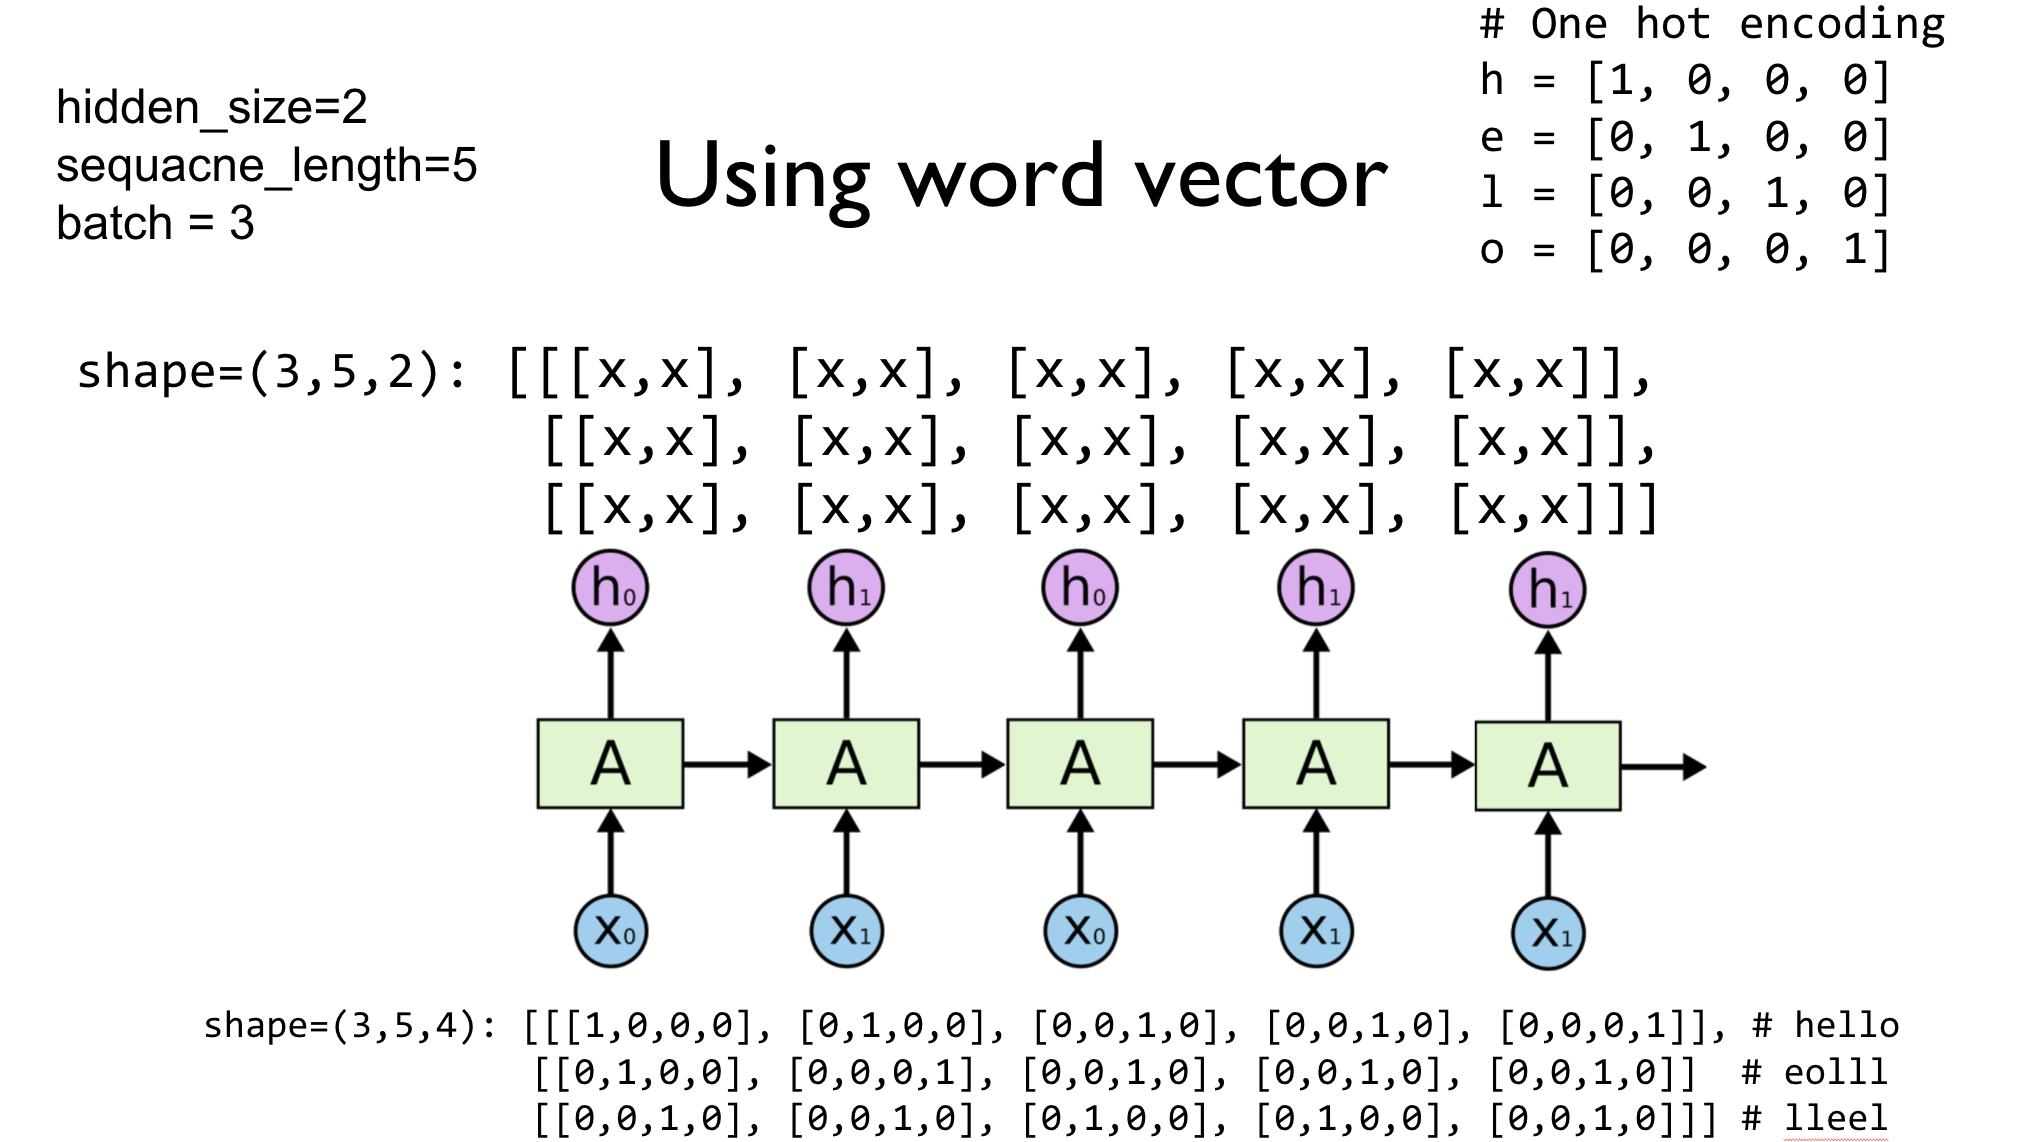

In [6]:
with tf.variable_scope('3_batches') as scope:
  # One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
  # 3 batches 'hello', 'eolll', 'lleel'
  x_data = np.array([[h, e, l, l, o],
                     [e, o, l, l, l],
                     [l, l, e, e, l]], dtype = np.float32)
  pp.pprint(x_data)

  hidden_size = 2
  cell = tf.nn.rnn_cell.LSTMCell(num_units = hidden_size, state_is_tuple = True)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
array([[[ 0.08760017, -0.11883128],
        [-0.03890643, -0.04488655],
        [-0.07565548,  0.05954119],
        [-0.10250817,  0.13099937],
        [-0.09120433,  0.02671147]],

       [[-0.14603813,  0.00449206],
        [-0.1259565 , -0.05536991],
        [-0.142

In [7]:
with tf.variable_scope('3_batches_dynamic_length') as scope:
  # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch 3
  # 3 batches 'hello', 'eolll', 'lleel'
  x_data = np.array([[h, e, l, l, o],
                     [e, o, l, l, l],
                     [l, l, e, e, l]], dtype = np.float32)
  pp.pprint(x_data)

  hidden_size = 2
  cell = tf.nn.rnn_cell.LSTMCell(num_units = hidden_size, state_is_tuple = True)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, sequence_length = [5, 3, 4], dtype = tf.float32)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
array([[[ 0.05641711,  0.04053361],
        [-0.0118327 ,  0.03888155],
        [ 0.1280365 ,  0.06535603],
        [ 0.21493395,  0.07477241],
        [ 0.21634315,  0.04112874]],

       [[-0.06176762,  0.01698818],
        [ 0.0488354 , -0.01413317],
        [ 0.16210437,  0.03248692],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.13157421,  0.04105158],
        [ 0.21527292,  0.05873857],
        [ 0.12951125,  0.04245252],
        [ 0.04723174,  

In [8]:
with tf.variable_scope('initial_state') as scope:
  batch_size = 3
  x_data = np.array([[h, e, l, l, o],
                     [e, o, l, l, l],
                     [l, l, e, e, l]], dtype = np.float32)
  pp.pprint(x_data)

  # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch: 3
  hidden_size = 2
  cell = tf.nn.rnn_cell.LSTMCell(num_units = hidden_size, state_is_tuple = True)
  initial_state = cell.zero_state(batch_size, tf.float32)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, initial_state = initial_state, dtype = tf.float32)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[ 0.02066794,  0.18937573],
        [-0.09161104,  0.19990404],
        [ 0.02523548,  0.05537761],
        [ 0.11843237, -0.06618693],
        [ 0.09082102, -0.19462553]],

       [[-0.10202094,  0.10549901],
        [-0.03819052, -0.07564168],
        [ 0.06729516, -0.135025  ],
        [ 0.16426733, -0.18215923],
        [ 0.24100232, -0.22127025]],

       [[ 0.10228881, -0.09438669],
        [ 0.18849969, -0.16262214],
        [ 0.0707139 , -0.00975773],
        [-0.05133893,  0.09124482],
        [ 0.06060871, -0.02556518]]], dtype=float32)


In [9]:
# Create input data
batch_size = 3
sequence_length = 5
input_dim = 3

x_data = np.arange(45, dtype = np.float32).reshape(batch_size, sequence_length, input_dim)
pp.pprint(x_data) # batch, sequence_length, input_dim

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]],

       [[15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.],
        [27., 28., 29.]],

       [[30., 31., 32.],
        [33., 34., 35.],
        [36., 37., 38.],
        [39., 40., 41.],
        [42., 43., 44.]]], dtype=float32)


In [10]:
with tf.variable_scope('generated_data') as scope:
  # One cell RNN input_dim (3) -> output_dim (5). sequence: 5, batch: 3
  cell = tf.nn.rnn_cell.LSTMCell(num_units = 5, state_is_tuple = True)
  initial_state = cell.zero_state(batch_size, tf.float32)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, initial_state = initial_state, dtype = np.float32)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval())

array([[[-2.0901974e-01,  1.0761840e-01, -1.3452291e-01,  2.4925914e-01,
          1.3660212e-01],
        [-3.7801614e-01,  1.4824828e-02, -7.2679363e-02,  5.5190331e-01,
          4.3970596e-02],
        [-5.2403492e-01, -4.5855582e-02, -1.7145934e-02,  6.5199709e-01,
          2.5519233e-03],
        [-6.5069520e-01, -3.4630693e-02, -2.4280346e-03,  6.5678495e-01,
          1.2754137e-04],
        [-7.5673568e-01, -1.6313367e-02, -2.7744457e-04,  6.2684625e-01,
          7.9539077e-06]],

       [[-4.1909179e-01, -3.8689654e-03, -3.4454504e-05,  4.3519017e-01,
          3.3194669e-07],
        [-6.7866677e-01, -2.3351931e-03, -4.6642685e-06,  5.1867235e-01,
          2.6151074e-08],
        [-8.3067000e-01, -1.0405981e-03, -6.4104540e-07,  5.1118815e-01,
          4.5604296e-15],
        [-9.1594148e-01, -4.3062592e-04, -9.1116014e-08,  4.8563752e-01,
          8.0957576e-23],
        [-9.6051323e-01, -1.7374779e-04, -1.3142906e-08,  4.6111363e-01,
          0.0000000e+00]],

      

In [11]:
'''
with tf.variable_scope('MultiRNNCell') as scope:
  # Make rnn
  cell = tf.nn.rnn_cell.LSTMCell(num_units = 5, state_is_tuple = True)
  cell = rnn.MultiRNNCell([cell] * 3, state_is_tuple = True) # 3 layers

  # rnn in/out
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)
  print("dynamic rnn: ", outputs)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval()) # batch size, unrolling (time). hidden_size
'''

'\nwith tf.variable_scope(\'MultiRNNCell\') as scope:\n  # Make rnn\n  cell = tf.nn.rnn_cell.LSTMCell(num_units = 5, state_is_tuple = True)\n  cell = rnn.MultiRNNCell([cell] * 3, state_is_tuple = True) # 3 layers\n\n  # rnn in/out\n  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)\n  print("dynamic rnn: ", outputs)\n  sess.run(tf.global_variables_initializer())\n  pp.pprint(outputs.eval()) # batch size, unrolling (time). hidden_size\n'

In [12]:
with tf.variable_scope('dynamic_rnn') as scope:
  cell = tf.nn.rnn_cell.LSTMCell(num_units = 5, state_is_tuple = True)
  outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32, sequence_length = [1, 3, 2])
  # lentgh 1 for batch 1, lentgh 2 for batch 2

  print("dynamic rnn: ", outputs)
  sess.run(tf.global_variables_initializer())
  pp.pprint(outputs.eval()) # batch size, unrolling (time), hidden_size

dynamic rnn:  Tensor("dynamic_rnn/rnn/transpose_1:0", shape=(3, 5, 5), dtype=float32)
array([[[-3.4102611e-02,  7.6269381e-02,  1.4547490e-01, -7.2706975e-02,
          9.7639754e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

       [[-2.1148182e-06,  7.3721725e-04, -1.8152770e-01, -3.1115240e-01,
          4.7026078e-05],
        [-1.2778173e-06,  2.4725418e-04, -2.6649910e-01, -5.2693778e-01,
          1.9058905e-05],
        [-6.6952236e-07,  6.0585506e-05, -3.1904304e-01, -6.6824031e-01,
          5.0932263e-06],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+

In [13]:
with tf.variable_scope('bi-directional') as scope:
  # bi-directional rnn
  cell_fw = tf.nn.rnn_cell.LSTMCell(num_units = 5, state_is_tuple = True)
  cell_bw = tf.nn.rnn_cell.LSTMCell(num_units = 5, state_is_tuple = True)

  outputs, states = tf.nn.bidirectional_dynamic_rnn(cell_fw, cell_bw, x_data,
                                                   sequence_length = [2, 3, 1],
                                                   dtype = tf.float32)
  
  sess.run(tf.global_variables_initializer())
  pp.pprint(sess.run(outputs))
  pp.pprint(sess.run(states))

Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
(   array([[[-7.3093250e-02, -1.0071330e-01, -2.4872418e-02, -2.6182491e-01,
          1.9975734e-01],
        [-6.4847921e-03, -9.6128955e-02, -1.3600221e-01, -7.4622452e-01,
          4.3492782e-01],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

       [[-1.9432244e-08, -3.2702464e-04, -5.6713641e-01, -7.6134700e-01,
          1.5337595e-01],
        [-0.0000000e+00, -3.8049955e-04, -8.4574383e-01, -7.6223028e-01,
          2.9210681e-01],
        [-0.0000000e+00, -2.5750278e-04, -9.4004548e-01, -7.6177865e-01,
          3.7886015e-01],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
     

In [14]:
# flattern based softmax
hidden_size = 3
sequence_length = 5
batch_size = 3
num_classes = 5

pp.pprint(x_data) # hidden_size=3, sequence_length=4, batch_size=2
x_data = x_data.reshape(-1, hidden_size)
pp.pprint(x_data)

softmax_w = np.arange(15, dtype = np.float32).reshape(hidden_size, num_classes)
outputs = np.matmul(x_data, softmax_w)
outputs = outputs.reshape(-1, sequence_length, num_classes)  # batch, seq, class
pp.pprint(outputs)

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]],

       [[15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.],
        [27., 28., 29.]],

       [[30., 31., 32.],
        [33., 34., 35.],
        [36., 37., 38.],
        [39., 40., 41.],
        [42., 43., 44.]]], dtype=float32)
array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.],
       [12., 13., 14.],
       [15., 16., 17.],
       [18., 19., 20.],
       [21., 22., 23.],
       [24., 25., 26.],
       [27., 28., 29.],
       [30., 31., 32.],
       [33., 34., 35.],
       [36., 37., 38.],
       [39., 40., 41.],
       [42., 43., 44.]], dtype=float32)
array([[[  25.,   28.,   31.,   34.,   37.],
        [  70.,   82.,   94.,  106.,  118.],
        [ 115.,  136.,  157.,  178.,  199.],
        [ 160.,  190.,  220.,  250.,  280.],
        [ 205.,  244.,  283.,  322.,  361.]],

 

In [15]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim]
prediction = tf.constant([[[0.2, 0.7], [0.6, 0.2], [0.2, 0.9]]], dtype = tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype = tf.float32)

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits = prediction, targets = y_data, weights = weights)
sess.run(tf.global_variables_initializer())
print("Loss: ", sequence_loss.eval())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Loss:  0.5967595


In [16]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim]
prediction1 = tf.constant([[[0.3, 0.7], [0.3, 0.7], [0.3, 0.7]]], dtype = tf.float32)
prediction2 = tf.constant([[[0.1, 0.9], [0.1, 0.9], [0.1, 0.9]]], dtype = tf.float32)

prediction3 = tf.constant([[[1, 0], [1, 0], [1, 0]]], dtype = tf.float32)
prediction4 = tf.constant([[[0, 1], [1, 0], [0, 1]]], dtype = tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype = tf.float32)

sequence_loss1 = tf.contrib.seq2seq.sequence_loss(prediction1, y_data, weights)
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(prediction2, y_data, weights)
sequence_loss3 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)
sequence_loss4 = tf.contrib.seq2seq.sequence_loss(prediction4, y_data, weights)

sess.run(tf.global_variables_initializer())
print("Loss1: ", sequence_loss1.eval(),
      "Loss2: ", sequence_loss2.eval(),
      "Loss3: ", sequence_loss3.eval(),
      "Loss4: ", sequence_loss4.eval())

Loss1:  0.5130153 Loss2:  0.3711007 Loss3:  1.3132616 Loss4:  0.64659494
